In [1]:
import data as dt
import regressor as rg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

In [2]:
file_path = "CCPP/Folds5x2_pp.xlsx"

In [3]:
data = dt.readData(file_path)                            # dataset
test_set = data[0:1000]                     
training = data[1000:]

In [4]:
""" Part B : Linear regression , best subset """
n = 5    # 5 fold
reg = rg.Regressor()

In [5]:
cols    = dt.comb(['AT','V','AP','RH'])       # returns combinations of the cols list
# divide the training data to the column combinations 
subsets = [training.loc[:,cols[i][k]] for i in range(len(cols)) for k in range(len(cols[i]))] 

In [6]:
tr_rms = np.zeros(len(subsets))              # training erms
t_rms  = np.zeros(len(subsets))              # testing error root mean square
v_rms = np.zeros(len(subsets))               # validation error root mean square
valid_std = np.zeros(len(subsets))           # validation standar deviation

In [7]:
for k in range(0,len(subsets)):      # loop over all subsets
    valid_rms = np.zeros(n)                   # validation Erms for the n-fold
    train_rms = np.zeros(n)                   # training Erms for the n-fold
    Weights = np.zeros((len(subsets[k].columns)+1,n))    # weights of the n-fold
    tdata = pd.concat([subsets[k], training['PE']], axis=1)  # subset k training data
    
    for i in range(n):                             # n-fold cross validation
        
        train_set, valid_set = dt.crossfold(tdata,n,i)         # Divide training data to two sets at round i of the cross validation
        
        Xtr = dt.getColumn(train_set, subsets[k].columns.tolist())   # Training set data
        Ytr = dt.getColumn(train_set, ['PE'])
        
        Xval = dt.getColumn(valid_set,subsets[k].columns.tolist())   # Validation set data
        Yval = dt.getColumn(valid_set,['PE'])

        W = reg.poly_fit(Xtr,Ytr , 1)                                # Polynomial model coefficients
        
        Weights[:, i] = W.reshape(W.shape[0])
        
        yval_predicted  = reg.predict(Xval, W,1)                     
      
        valid_rms[i] = reg.error_rms(Yval, yval_predicted.reshape(Yval.shape))  
        
        ytrain_predicted = reg.predict(Xtr, W,1)
        train_rms[i]     = reg.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))

    tr_rms[k] = np.mean(train_rms)
    v_rms[k]  = np.mean(valid_rms)
    valid_std[k] = np.std(valid_rms)
    
    Xtest = dt.getColumn(test_set,subsets[k].columns.tolist())
    Ytest = dt.getColumn(test_set,['PE'])
    W =  Weights[:, np.argsort(valid_rms)[0]]
    
    ytest_predicted = reg.predict(Xtest, W,1)
    t_rms[k] =  reg.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))
    
    

Subset  1  :  ['AT']
Subset  2  :  ['V']
Subset  3  :  ['AP']
Subset  4  :  ['RH']
Subset  5  :  ['AT', 'V']
Subset  6  :  ['AT', 'AP']
Subset  7  :  ['AT', 'RH']
Subset  8  :  ['V', 'AP']
Subset  9  :  ['V', 'RH']
Subset  10  :  ['AP', 'RH']
Subset  11  :  ['AT', 'V', 'AP']
Subset  12  :  ['AT', 'V', 'RH']
Subset  13  :  ['AT', 'AP', 'RH']
Subset  14  :  ['V', 'AP', 'RH']
Subset  15  :  ['AT', 'V', 'AP', 'RH']
Best Subset is :  ['AT', 'V', 'AP', 'RH']


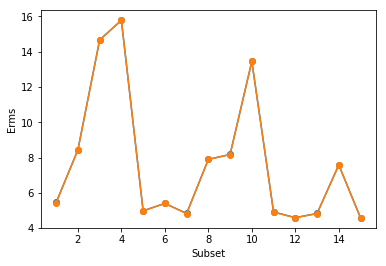

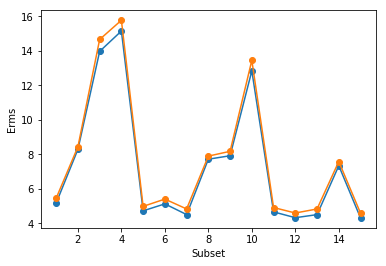

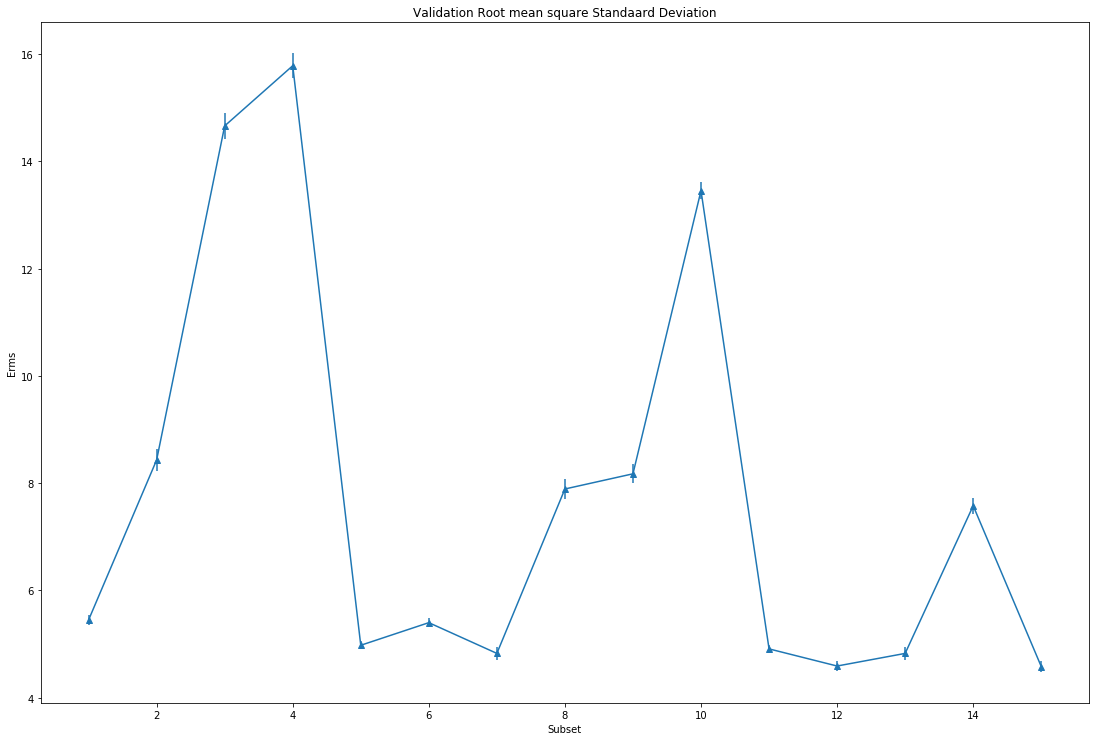

In [8]:

min_indx = np.argsort(v_rms)[0]       # Indx of the set with the lowest validation Erms

for k in range(len(subsets)):
    print("Subset ", k+1 , " : ", subsets[k].columns.tolist())

print("Best Subset is : "  , subsets[min_indx].columns.tolist())

# Plot Training Erms versus Vrms 
x  = range(1,len(tr_rms)+1)
plt.figure(0)
plt.xlabel('Subset')
plt.ylabel('Erms')
plt.plot(x,tr_rms,'-o')
plt.plot(x,v_rms, '-o')
plt.show()

# Plot training Erms versus testing Erms
plt.figure(1)
plt.xlabel('Subset')
plt.ylabel('Erms')
plt.plot(x,t_rms,'-o')
plt.plot(x,tr_rms, '-o')
plt.show()


# Plot validation Erms standard deviation
x  = range(1,len(v_rms)+1)
plt.figure(figsize=(6*3.13,4*3.13))
plt.title("Validation Root mean square Standaard Deviation")
plt.xlabel("Subset")
plt.ylabel("Erms")
plt.errorbar(x, v_rms, valid_std, marker='^')
plt.show()